In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
for fn in uploaded.keys():
  print(fn)

CarPrice_Assignment.csv


In [ ]:
import itertools
import io
#dataset import
dataset=pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

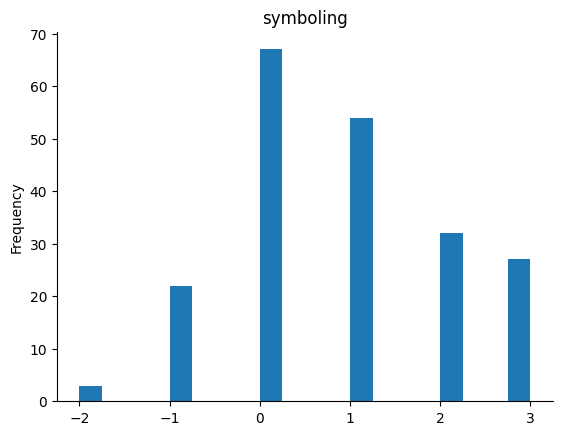

In [ ]:
from matplotlib import pyplot as plt
dataset['symboling'].plot(kind='hist', bins=20, title='symboling')
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='count', ylabel='CarName'>

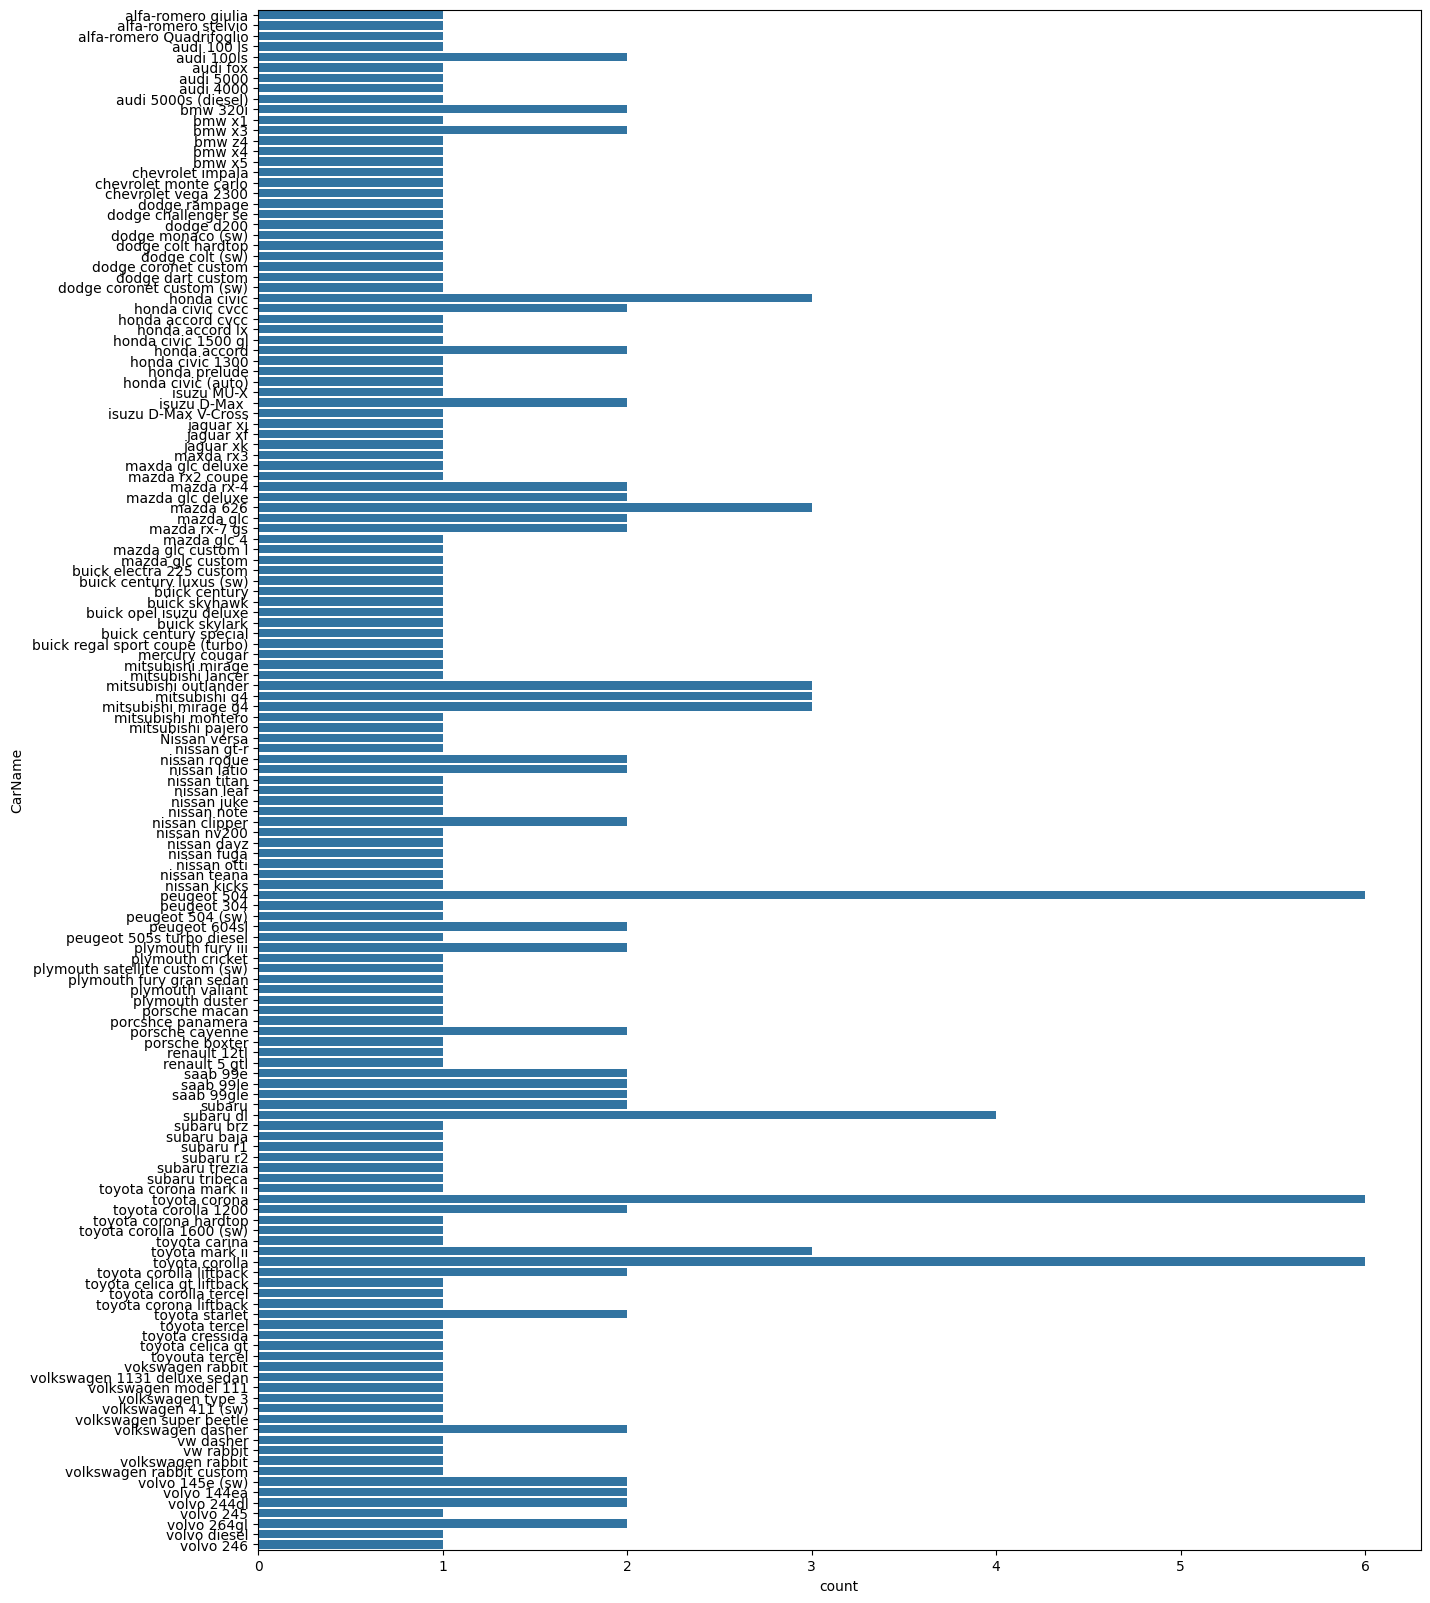

In [ ]:
plt.figure(figsize=(15, 20))
sns.countplot(dataset['CarName'])

<Axes: xlabel='count', ylabel='fueltype'>

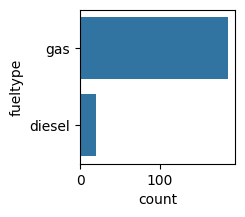

In [ ]:
plt.figure(figsize=(2, 2))
sns.countplot(dataset['fueltype'])

<Axes: xlabel='count', ylabel='carbody'>

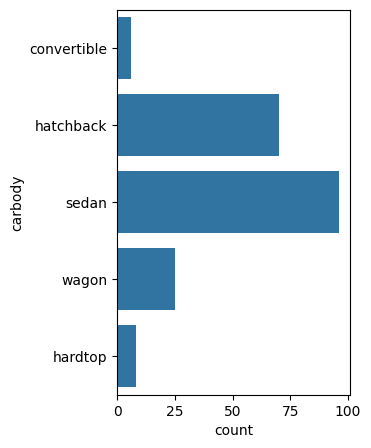

In [ ]:
plt.figure(figsize=(3, 5))
sns.countplot(dataset['carbody'])

In [ ]:
#Encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['CarName']=encoder.fit_transform(dataset['CarName'])
dataset['fueltype']=encoder.fit_transform(dataset['fueltype'])
dataset['carbody']=encoder.fit_transform(dataset['carbody'])
dataset['enginetype']=encoder.fit_transform(dataset['enginetype'])
dataset['cylindernumber']=encoder.fit_transform(dataset['cylindernumber'])
dataset['fuelsystem']=encoder.fit_transform(dataset['fuelsystem'])
dataset['aspiration']=encoder.fit_transform(dataset['aspiration'])
dataset['drivewheel']=encoder.fit_transform(dataset['drivewheel'])
dataset['doornumber']=encoder.fit_transform(dataset['doornumber'])
dataset['enginelocation']=encoder.fit_transform(dataset['enginelocation'])



In [ ]:
display(dataset)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


<Axes: >

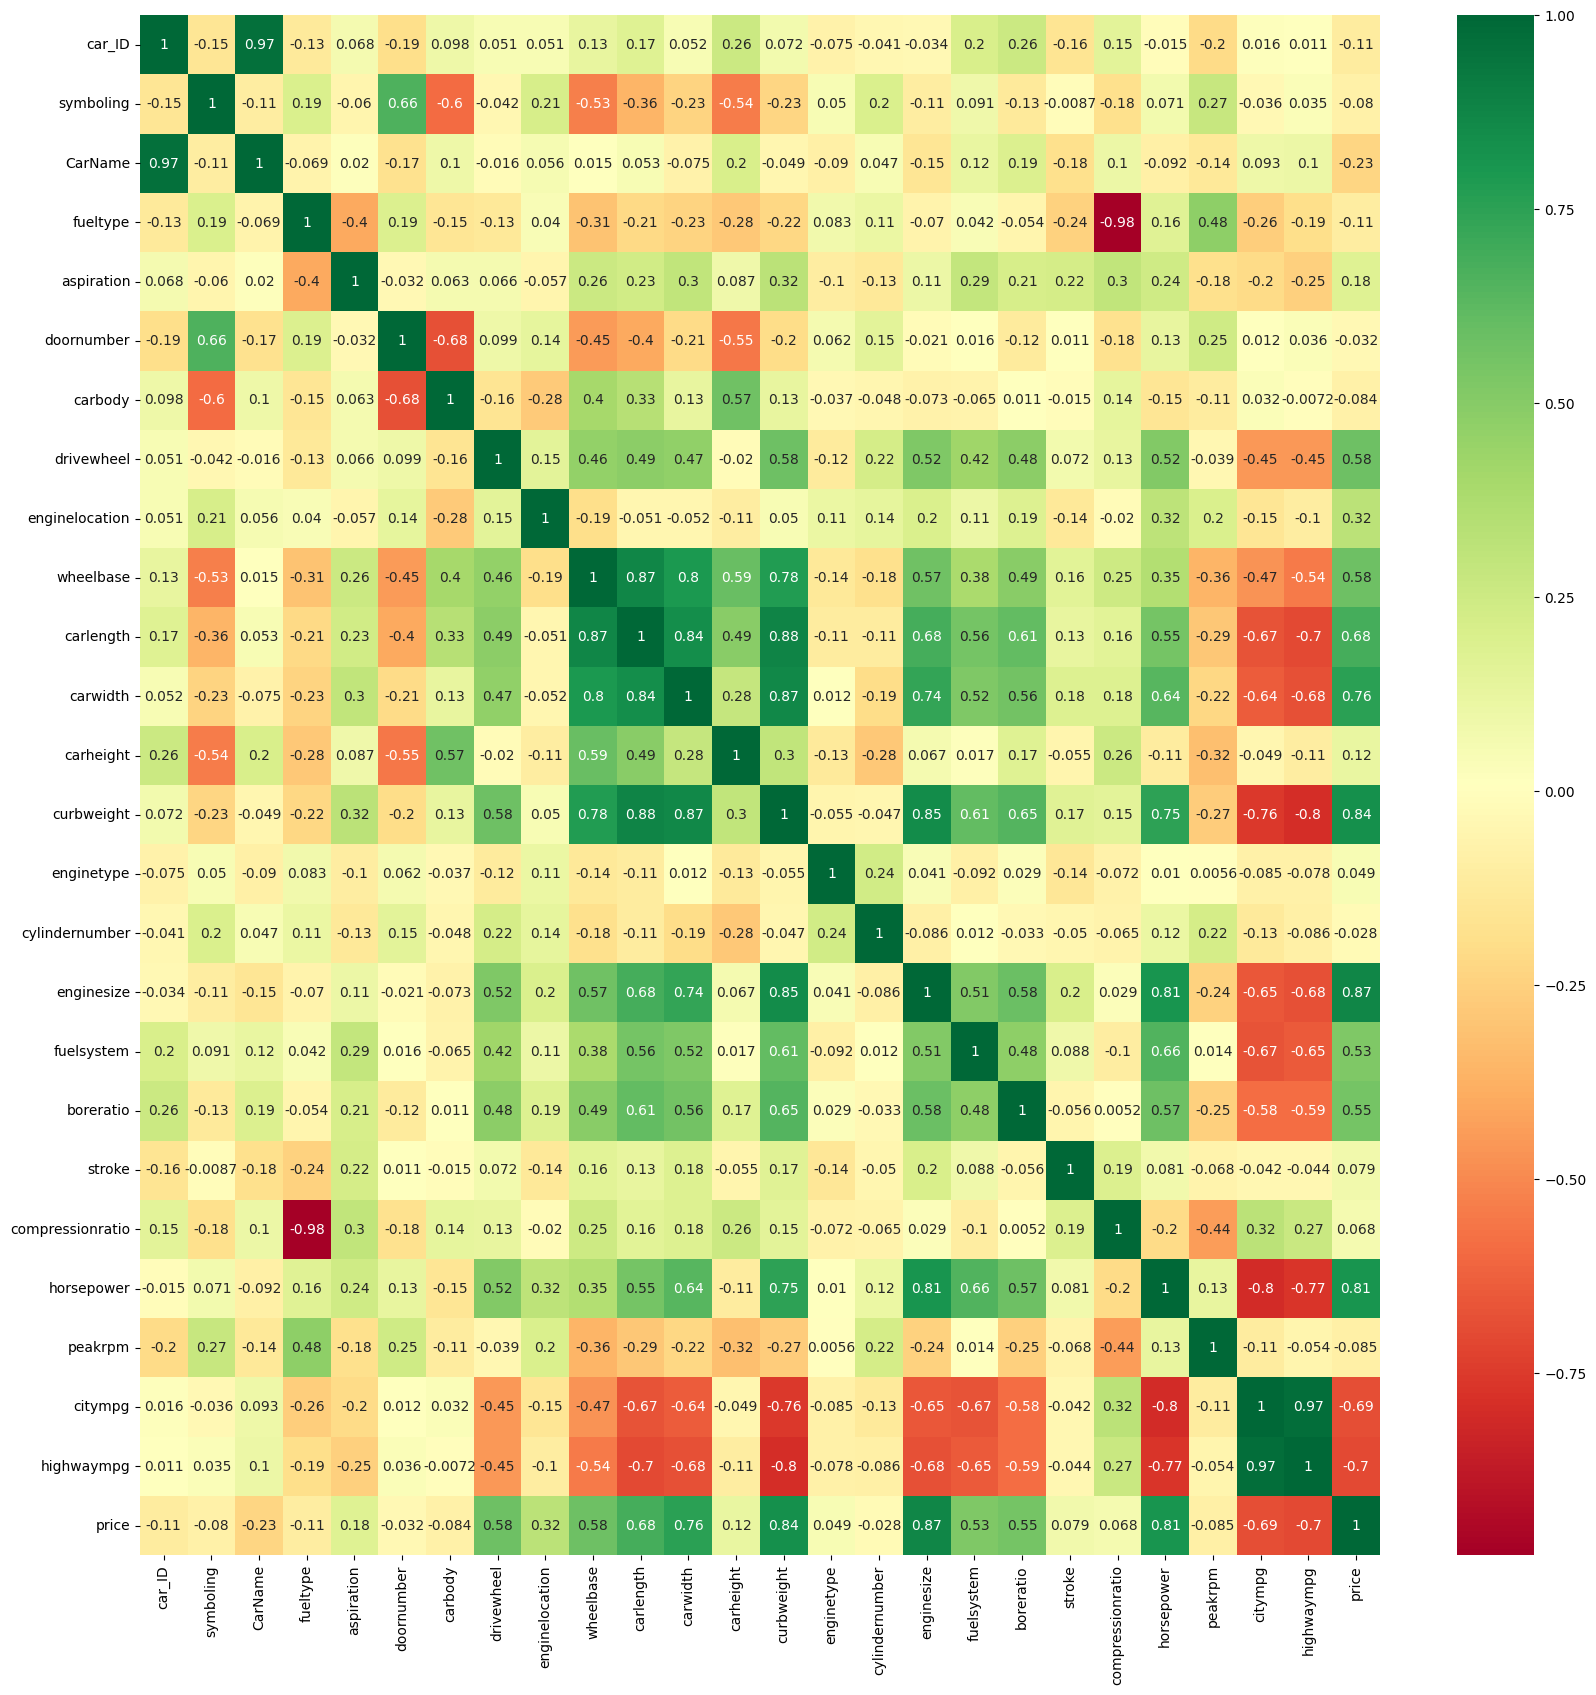

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(dataset.corr(),annot=True, cmap='RdYlGn')


In [ ]:
x=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,25].values

In [ ]:
#Splitting dataset into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [ ]:
#predicition
y_pred=regressor.predict(x_test)

In [ ]:
print("Train Accuracy:",regressor.score(x_train,y_train))
print("Test Accuracy:",regressor.score(x_test,y_test))

Train Accuracy: 0.9157845788747837
Test Accuracy: 0.8113230018091971
